[Gradient Descent](https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work/notebook)

In [ ]:
from ipywidgets import interact
from fastai.basics import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rc('figure', dpi=90)
print('Matplotlib version:', mpl.__version__)
print('Has mpl.colors:', hasattr(mpl,'colors'))

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: 
        plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

Matplotlib version: 3.9.4
Has mpl.colors: True


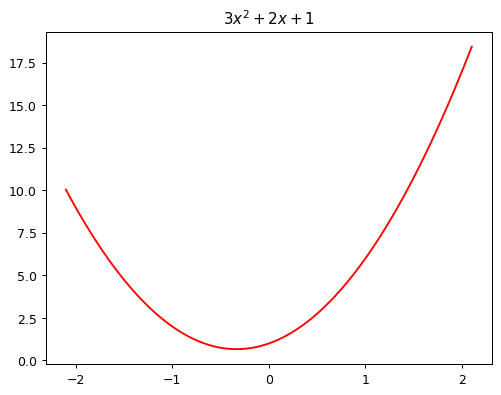

In [ ]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f=f, title="$3x^2 + 2x + 1$")

In [4]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [5]:
def mk_quad(a,b,c): return partial(quad, a,b,c)

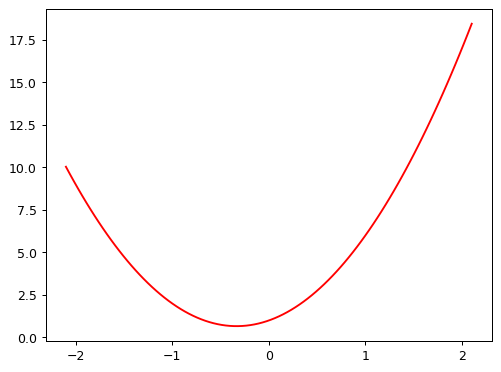

In [6]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [16]:
def noise(x, scale): 
    return np.random.normal(scale=scale, size=x.shape)

def add_noise(x, mult, add): 
    return x * (1+noise(x,mult)) + noise(x,add)

In [24]:
# np.random.seed(42)

x = torch.linspace(start=-2, end=2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

/var/folders/nl/2rfqmz3n0bv9983_yc4xgszm0000gn/T/ipykernel_30513/828755188.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return x * (1+noise(x,mult)) + noise(x,add)


In [27]:
x[:5], y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[8.9529],
         [5.2463],
         [3.2867],
         [4.2390],
         [4.4485]], dtype=torch.float64))

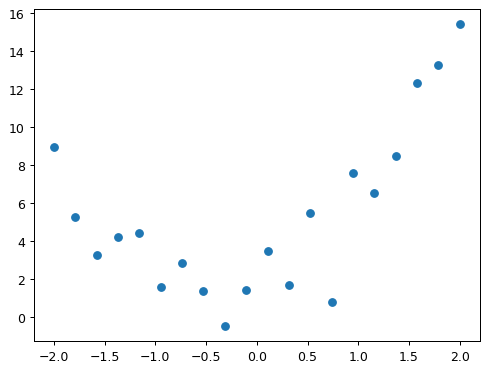

In [28]:
plt.scatter(x,y);

In [ ]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…